# Preprocessing of Facebook Data + Calculation of Sentiment & Polarity Statistics

# Imports + Definitions

In [72]:
!pip install nltk

In [73]:
!pip install vaderSentiment

In [74]:
!pip install researchpy

In [75]:
!pip install pingouin

In [76]:
# importing libraries
import researchpy as rp
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
from datetime import datetime
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin as pg
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
new_england = ["HarvardNC.csv", "BostonCollegeNC.csv", "DartmouthNC.csv", "UConnNC.csv", "MITnewsNC.csv"]
mid_atlantic = ["pennstateNC.csv", "NYUNC.csv", "UnivPennsylvaniaNC.csv", "PrincetonUNC.csv", "RITfbNC.csv"]
east_north_central = ["UniversityOfMichiganNC.csv", "notredameNC.csv", "spartans.msuNC.csv", "illinois.eduNC.csv", "PurdueUniversityNC.csv"]
west_north_central = ["KStateNC.csv", "universityofiowaNC.csv", "KUNC.csv", "IowaStateUNC.csv", "UofMNNC.csv"]
south_atlantic = ["clemsonunivNC.csv", "universityofgaNC.csv", "georgiatechNC.csv", "DukeUnivNC.csv", "virginiatechNC.csv"]
east_south_central = ["universityofalabamaNC.csv", "auburnuNC.csv", "UTKnoxvilleNC.csv", "msstateNC.csv", "olemissNC.csv"]
west_south_central = ["UTAustinTXNC.csv", "uofoklahomaNC.csv", "txstateuNC.csv", "tamuNC.csv", "BaylorUniversity1845NC.csv"]
mountain = ["BYUNC.csv", "arizonastateuniversityNC.csv", "universityofutahNC.csv", "cuboulderNC.csv", "uarizonaNC.csv"]
pacific = ["StanfordNC.csv", "UCSanDiegoNC.csv", "UofWANC.csv", "UCDavisNC.csv", "universityoforegonNC.csv"]

In [78]:
online_f = ["HarvardNC.csv", "DartmouthNC.csv", "UnivPennsylvaniaNC.csv", "clemsonunivNC.csv", "spartans.msuNC.csv", "universityofutahNC.csv", "StanfordNC.csv", "UCSanDiegoNC.csv", "UofWANC.csv", "UConnNC.csv", "PrincetonUNC.csv", "MITnewsNC.csv", "UofMNNC.csv", "universityoforegonNC.csv", "uarizonaNC.csv"]
hybrid_f = ["UniversityOfMichiganNC.csv", "arizonastateuniversityNC.csv", "UTAustinTXNC.csv", "georgiatechNC.csv", "auburnuNC.csv", "pennstateNC.csv", "UTKnoxvilleNC.csv", "NYUNC.csv", "illinois.eduNC.csv", "msstateNC.csv", "cuboulderNC.csv", "DukeUnivNC.csv", "UCDavisNC.csv", "olemissNC.csv", "BaylorUniversity1845NC.csv"]
in_person_f = ["notredameNC.csv", "universityofiowaNC.csv", "universityofalabamaNC.csv", "BYUNC.csv", "universityofgaNC.csv", "txstateuNC.csv", "KStateNC.csv", "uofoklahomaNC.csv", "KUNC.csv", "BostonCollegeNC.csv", "IowaStateUNC.csv", "tamuNC.csv", "PurdueUniversityNC.csv", "RITfbNC.csv", "virginiatechNC.csv"]

online_s = ["HarvardNC.csv", "DartmouthNC.csv", "UnivPennsylvaniaNC.csv", "clemsonunivNC.csv", "spartans.msuNC.csv", "universityofutahNC.csv", "StanfordNC.csv", "UCSanDiegoNC.csv", "UofWANC.csv", "KStateNC.csv", "UTAustinTXNC.csv", "NYUNC.csv", "PrincetonUNC.csv", "cuboulderNC.csv", "UCDavisNC.csv", "MITnewsNC.csv", "PurdueUniversityNC.csv", "universityoforegonNC.csv", "uarizonaNC.csv", "RITfbNC.csv"]
hybrid_s = ["UniversityOfMichiganNC.csv", "arizonastateuniversityNC.csv","pennstateNC.csv",  "BYUNC.csv", "UTKnoxvilleNC.csv", "BostonCollegeNC.csv", "IowaStateUNC.csv", "illinois.eduNC.csv", "UConnNC.csv", "tamuNC.csv", "DukeUnivNC.csv", "UofMNNC.csv"]
in_person_s = ["notredameNC.csv", "universityofiowaNC.csv", "universityofalabamaNC.csv", "universityofgaNC.csv", "txstateuNC.csv", "georgiatechNC.csv", "auburnuNC.csv", "uofoklahomaNC.csv", "KUNC.csv", "msstateNC.csv", "olemissNC.csv", "BaylorUniversity1845NC.csv", "virginiatechNC.csv"]


all_univs = online_f + in_person_f + hybrid_f

In [79]:
covid_dict = ["6 feet apart", "6' apart", "asymptomatic", "community spread", 
            "confirmed positive case", "confirmed positive cases", 
            "contact trace", "contact traced", "contact tracing", "coronavirus", 
            "COVID", "COVID-19", "COVID19", "distance learning", "endemic", 
            "epidemic", "face covering", "face coverings", "facemask", "facemasks", 
            "flatten the curve", "flattened the curve", "flattening the curve", 
            "herd immunity", "hybrid classes", "hybrid instruction", "hybrid learning", 
            "hybrid semester", "hybrid semester", "hybrid teaching", 
            "in person classes", "in person courses", "in person intruction", 
            "in person learning", "in person school", "in person semester", 
            "in person teaching", "in-person classes", "in-person courses", 
            "in-person intruction", "in-person learning", "in-person school", 
            "in-person semester", "in-person teaching", "isolation", 
            "learning at home", "learning from home", "learning online", 
            "learning remotely", "lockdown ", "mask", "mask mandate", 
            "mask required", "masks required", "nasal swab", "online classes", 
            "online courses", "online instruction", "online learning", 
            "online school", "online semester", "online teaching", "outbreak", 
            "pandemic", "physical distance", "physical distancing", 
            "physically distanced", "physically distancing", "PPE", 
            "quarantine", "quarantining", "rapid test", "remote coursework", 
            "remote instruction", "remote learning", "remote semester", 
            "remote teaching", "return to learn", "return to the classroom", 
            "safety protocols", "SARS-CoV-2", "self-isolation", "self-monitoring", 
            "shelter-in-place", "six feet apart", "social distance", 
            "social distancing", "social isolation", "socially distanced", 
            "socially distant", "spit test", "symptomatic", "teaching remotely", 
            "transmission", "transmit", "vaccinate", "vaccinated", "vaccination", 
            "vaccine", "vax", "vaxination", "vaxine", "vaxx", "vaxxination", 
            "vaxxine", "ventilator", "virtual instruction", "virtual learning", 
            "virtual semester", "work from home", "working at home", 
            "working from home", "working remotely", "zoom classes", 
            "zoom coursework", "zoom instruction", "zoom learning", "zoom semester"]
            
reopening_dict = ["distance learning", "hybrid classes", "hybrid instruction", 
                  "hybrid learning", "hybrid semester", "hybrid semester", 
                  "hybrid teaching", "in person classes", "in person courses", 
                  "in person instruction", "in person learning", 
                  "in person school", "in person semester", "in person teaching", 
                  "in-person classes", "in-person courses", "in-person instruction", 
                  "in-person learning", "in-person school", "in-person semester", 
                  "in-person teaching", "learning at home", "learning from home", 
                  "learning online", "learning remotely", "online classes", 
                  "online courses", "online instruction", "online learning", 
                  "online school", "online semester", "online teaching", 
                  "remote coursework", "remote instruction", "remote learning", 
                  "remote semester", "remote teaching", "return to learn", 
                  "return to the classroom", "teaching remotely", 
                  "virtual instruction", "virtual learning", "virtual semester", 
                  "work from home", "working at home", "working from home", 
                  "working remotely", "zoom classes", "zoom coursework", 
                  "zoom instruction", "zoom learning", "zoom semester"]

covid_keywords = '|'.join(covid_dict)
reopening_keywords = '|'.join(reopening_dict)

# Helper Functions

In [111]:
# generates column names (will be 0, 1, 2, ..., largest_column_count - 1)
def get_largest_col_count(csv_file):
  data_file_delimiter = ','
  largest_column_count = 0

  with open(csv_file, 'r') as temp_f:
      lines = temp_f.readlines()

      for l in lines:
          column_count = len(l.split(data_file_delimiter)) + 1
          largest_column_count = column_count if largest_column_count < column_count else largest_column_count
  
  column_names = [i for i in range(0, largest_column_count)]

  return column_names

In [112]:
# concatenates multiple universities' data
def compile_dataset(schools):
  df_combined = pd.DataFrame()

  for school in schools:
    column_names = get_largest_col_count(school)
    df = pd.read_csv(school, header=None, delimiter=",", names=column_names) 
    df = df.fillna('')
    df_combined = df_combined.append(df)
  
  total_num_posts = df_combined.shape[0]
  
  df_combined = df_combined.fillna('')

  return df_combined, total_num_posts

In [113]:
# filters posts using COVID dictionary
def filter_covid_posts(df):
  df_covid = df[df.iloc[:, 0].str.contains(covid_keywords, case=False)]
  return df_covid, df_covid.shape[0]

In [114]:
# filters posts based on designated time frame (i.e.: fall 2020, spring 2021)
def get_posts_by_period(df, start_date, end_date):
  df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])
  
  after_start_date = df.iloc[:, 1] >= start_date
  before_end_date = df.iloc[:, 1] <= end_date
  between_two_dates = after_start_date & before_end_date
  filtered_dates = df.loc[between_two_dates]
  
  return filtered_dates, filtered_dates.shape[0]

In [115]:
# returns only the post comments
def get_comments_only(df):
  df = df.fillna('')
  return df.iloc[:, 2:]

In [116]:
# uses NLTK to sentence tokenize the dataset (works best for VADER)
def sentence_tokenize(df):
  sentence_list = []
  for rowIndex, row in df.iterrows(): # iterate over rows
    row = row.str.replace('\\','').str.strip()
    for columnIndex, value in row.items():
        if type(value) is str:
            value = value.replace('\n', ' ').replace(':::', ',')
            value = re.sub(r'http\S+', '', value) # removes URLs

            # # CHECK
            # if (any(value in s for s in english_names) and len(value.split()) == 2):
            #   continue

            for sentence in sent_tokenize(value):
              sentence_list.append(sentence)

  return sentence_list

In [117]:
analyzer = SentimentIntensityAnalyzer()

# uses VADER to measure comment sentiment
def analyze_sentiment(df):
  sentence_list = sentence_tokenize(df)
  polarity_list = []
  for sentence in sentence_list:
      if sentence:
          vs = analyzer.polarity_scores(sentence)
          polarity_list.append([sentence, vs])

  polarity_df = pd.DataFrame(polarity_list, columns=['Comment', 'Sentiment'])
  polarity_df['neg']  = polarity_df['Sentiment'].apply(lambda score_dict: score_dict['neg'])
  polarity_df['neu']  = polarity_df['Sentiment'].apply(lambda score_dict: score_dict['neu'])
  polarity_df['pos']  = polarity_df['Sentiment'].apply(lambda score_dict: score_dict['pos'])
  polarity_df['compound']  = polarity_df['Sentiment'].apply(lambda score_dict: score_dict['compound'])
  polarity_df['comp_score'] = polarity_df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

  return polarity_df

In [118]:
# calculates relevant sentiment statistics (mean, standard deviation)
def sentiment_stats(df):
  sentiment_scores = df['compound'].tolist()
  mean = np.mean(sentiment_scores)
  std_dev = np.std(sentiment_scores)
  conf_int = st.norm.interval(alpha=0.95, loc=mean, scale=st.sem(sentiment_scores))

  return mean, std_dev

In [119]:
# Main Method
def compile_filter_analyze(schools, is_fall, is_spr):
  compiled_data, total_num_posts = compile_dataset(schools)
  if is_fall:
    compiled_data, total_num_posts = get_posts_by_period(compiled_data, "2020-6-1", "2020-12-31")
  elif is_spr:
    compiled_data, total_num_posts = get_posts_by_period(compiled_data, "2021-1-1", "2021-7-1")

  filtered_df, total_pandemic_posts = filter_covid_posts(compiled_data)

  percentage_covid_posts = total_pandemic_posts / total_num_posts

  comments = get_comments_only(filtered_df)
  polarity_df = analyze_sentiment(comments)

  mean_sentiment, sentiment_stdev = sentiment_stats(polarity_df)
  
  return percentage_covid_posts, mean_sentiment, sentiment_stdev, polarity_df

# **Results**

Sentiment Mean and Standard Deviation for all Universities

In [148]:
# do sentiment for one school at a time and then take mean (for loop over all_univs)
all_uni_dict = {}
for univ in all_univs:
  fall_pc, fall_mean, fall_stdev, _ = compile_filter_analyze([univ], True, False)
  spring_pc, spring_mean, spring_stdev, _ = compile_filter_analyze([univ], False, True)
  all_uni_dict[univ] = (fall_pc, fall_mean, fall_stdev,  spring_pc, spring_mean, spring_stdev)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,29

In [149]:
print(all_uni_dict)

{'HarvardNC.csv': (0.25517241379310346, 0.10974125258799172, 0.36813031175073585, 0.2556390977443609, 0.15056095186587345, 0.3827161974895176), 'DartmouthNC.csv': (0.17721518987341772, 0.21054133333333333, 0.38710679270483256, 0.21804511278195488, 0.13500444444444445, 0.411258690304068), 'UnivPennsylvaniaNC.csv': (0.33159268929503916, 0.14081714285714286, 0.40219222924438014, 0.23743016759776536, 0.11459285714285715, 0.3819219867689617), 'clemsonunivNC.csv': (0.1792452830188679, 0.047364593301435415, 0.356750111891899, 0.08695652173913043, 0.060894193548387106, 0.3949127743200058), 'spartans.msuNC.csv': (0.1625, 0.10727984615384614, 0.3634599459171948, 0.0970873786407767, 0.14873045375218152, 0.34685345914080806), 'universityofutahNC.csv': (0.2660098522167488, 0.14478686046511627, 0.3659370558111391, 0.1476510067114094, 0.14496758620689654, 0.4028451496599139), 'StanfordNC.csv': (0.2358490566037736, 0.13672860215053764, 0.3705125512061256, 0.12359550561797752, 0.19776238738738738, 0.35

Total Number of Posts + Comments

In [ ]:
compiled_data, total_num_posts = compile_dataset(all_univs)
print(total_num_posts)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,29

28749


In [ ]:
def comment_counter(schools):
  df, _ = compile_dataset(schools)
  df, tp = get_posts_by_period(df, "2020-7-1", "2020-12-31")
  df = df[df.iloc[:, 0].str.contains(reopening_keywords, case=False)]
  print(df.shape[0]/tp * 100)
  comment_count = 0
  for rowIndex, row in df.iterrows():
    for columnIndex, value in row.items():
          if value != '':
              comment_count += 1
  print(comment_count)

In [ ]:
comment_counter(online_f)
comment_counter(hybrid_f)
comment_counter(in_person_f)

2.1551724137931036
695


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,29

1.8857142857142857
780
1.1644318983768525
1062


Emotional Intensity of COVID vs Non-COVID Posts

In [ ]:
# Get sentiment for non-COVID posts for the entire academic year
non_covid_data = compiled_data[~compiled_data.iloc[:, 0].str.contains(covid_keywords, case=False)]
non_covid_data, total_num_posts = get_posts_by_period(non_covid_data, "2020-7-1", "2021-6-30")
print(total_num_posts)

In [ ]:
# Get sentiment for COVID posts
covid_data = compiled_data[compiled_data.iloc[:, 0].str.contains(covid_keywords, case=False)]
covid_data, total_num_posts = get_posts_by_period(covid_data, "2020-7-1", "2021-6-30")
print(total_num_posts)

In [ ]:
# Non-Covid Fall
non_covid_f, total_num_posts = get_posts_by_period(non_covid_data, "2020-6-1", "2020-12-31")
non_covid_comments = get_comments_only(non_covid_f)
non_cov_df_f = analyze_sentiment(non_covid_comments)
non_cov_mean, non_cov_stdev = sentiment_stats(non_cov_df_f)
print(non_cov_mean)
print(non_cov_stdev)

# Non-Covid Spring
non_covid_s, total_num_posts = get_posts_by_period(non_covid_data, "2021-1-1", "2021-7-1")
non_covid_comments = get_comments_only(non_covid_s)
non_cov_df_s = analyze_sentiment(non_covid_comments)
non_cov_mean, non_cov_stdev = sentiment_stats(non_cov_df_s)
print(non_cov_mean)
print(non_cov_stdev)

0.18948232638513876
0.37628599817338926
0.2286994953330731
0.3865727825695245


In [ ]:
# Covid Fall
covid_f, total_num_posts = get_posts_by_period(covid_data, "2020-6-1", "2020-12-31")
covid_comments = get_comments_only(covid_f)
cov_df_f = analyze_sentiment(covid_comments)
cov_mean, cov_stdev = sentiment_stats(cov_df_f)
print(cov_mean)
print(cov_stdev)

# Covid Spring
covid_s, total_num_posts = get_posts_by_period(covid_data, "2021-1-1", "2021-7-1")
covid_comments = get_comments_only(covid_s)
cov_df_s = analyze_sentiment(covid_comments)
cov_mean, cov_stdev = sentiment_stats(cov_df_s)
print(cov_mean)
print(cov_stdev)

0.12545866407159198
0.38426206618312037
0.11395777512226428
0.3971588062987235


In [ ]:
# determining whether the data meets the conditions for an Indpendent T-Test
from scipy import stats

# Shapiro-Wilk test for normality
print(stats.shapiro(non_cov_df_f['compound']))
print(stats.shapiro(cov_df_f['compound']))
print(stats.shapiro(non_cov_df_s['compound']))
print(stats.shapiro(cov_df_s['compound']))

(0.8996303081512451, 0.0)
(0.9303734302520752, 0.0)
(0.8993701934814453, 0.0)
(0.9303643107414246, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# non-gaussian data: non-parametric statistical analysis required

# Mann-Whitney U Test
print(stats.mannwhitneyu(non_cov_df_f['compound'], cov_df_f['compound']))
print(stats.mannwhitneyu(non_cov_df_s['compound'], cov_df_s['compound']))

MannwhitneyuResult(statistic=3165477513.0, pvalue=9.914071659289235e-196)
MannwhitneyuResult(statistic=2688790291.0, pvalue=0.0)


In [ ]:
# confidence intervals for means
def get_conf(df):
  sentiment_scores = df['compound'].tolist()
  mean = np.mean(sentiment_scores)
  conf_int = st.norm.interval(alpha=0.95, loc=mean, scale=st.sem(sentiment_scores))
  print((conf_int[1] - conf_int[0]))

get_conf(non_cov_df_f)
get_conf(non_cov_df_s)
get_conf(cov_df_f)
get_conf(cov_df_s)

0.003957947569718234
0.00403718381249446
0.006747294317782079
0.007323702990219644


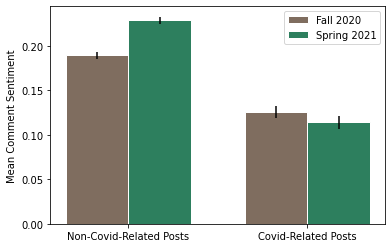

In [ ]:
import matplotlib.pyplot as plt

# set width of bars
barWidth = 0.35
 
# set heights of bars (mean)
bars2 = [0.18948232638513876, 0.12545866407159198]
bars3 = [0.2286994953330731, 0.11395777512226428]
 
# Set position of bar on X axis
r1 = np.arange(len(bars2))
r2 = [x + barWidth for x in r1]
 
# Make the plot (error bars = confidence interval)
plt.bar(r1, bars2, yerr=[0.003957947569718234, 0.006747294317782079], color='#7f6d5f', width=barWidth, edgecolor='white', label='Fall 2020')
plt.bar(r2, bars3, yerr=[0.00403718381249446, 0.007323702990219644], color='#2d7f5e', width=barWidth, edgecolor='white', label='Spring 2021')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth - 0.175 for r in range(len(bars2))], ['Non-Covid-Related Posts', 'Covid-Related Posts'])
plt.ylabel('Mean Comment Sentiment')

# Create legend & Show graphic
plt.legend()

In [ ]:
# Generate data distribution combining 3 normal distributions
data = np.array(non_cov_df_f['compound'])

# The x values corresponding to the generated distribution
x = np.linspace(data.min(),data.max(), data.shape[0])

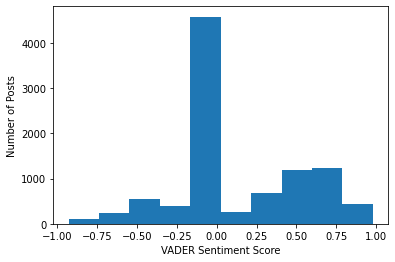

In [ ]:
# compound score distributions
import matplotlib.pyplot as plt
x = ip_df_s['compound']
plt.hist(x, bins = 10)
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Number of Posts')
plt.show()

Sentiment Based On Policy

In [ ]:
# dict of the sentiment stats for all universities in the form "university_name" : fall_pc, fall_mean, fall_stdev,  spring_pc, spring_mean, spring_stdev
# note that pc refers to the percentage of posts about coronavirus
all_uni_stats = {'HarvardNC.csv': (0.25517241379310346, 0.10974125258799172, 0.36813031175073585, 0.2556390977443609, 0.15056095186587345, 0.3827161974895176), 'DartmouthNC.csv': (0.17721518987341772, 0.21054133333333333, 0.38710679270483256, 0.21804511278195488, 0.13500444444444445, 0.411258690304068), 'UnivPennsylvaniaNC.csv': (0.33159268929503916, 0.14081714285714286, 0.40219222924438014, 0.23743016759776536, 0.11459285714285715, 0.3819219867689617), 'clemsonunivNC.csv': (0.1792452830188679, 0.047364593301435415, 0.356750111891899, 0.08695652173913043, 0.060894193548387106, 0.3949127743200058), 'spartans.msuNC.csv': (0.1625, 0.10727984615384614, 0.3634599459171948, 0.0970873786407767, 0.14873045375218152, 0.34685345914080806), 'universityofutahNC.csv': (0.2660098522167488, 0.14478686046511627, 0.3659370558111391, 0.1476510067114094, 0.14496758620689654, 0.4028451496599139), 'StanfordNC.csv': (0.2358490566037736, 0.13672860215053764, 0.3705125512061256, 0.12359550561797752, 0.19776238738738738, 0.35972155805363487), 'UCSanDiegoNC.csv': (0.31226765799256506, 0.14042220670391062, 0.40700352025318215, 0.26515151515151514, 0.30189027690371306, 0.3751563380382665), 'UofWANC.csv': (0.3069908814589666, 0.1312768115942029, 0.37161923895078963, 0.22404371584699453, 0.03127030284301607, 0.4028666695356865), 'UConnNC.csv': (0.21875, 0.2620523809523809, 0.3958182216759774, 0.18596491228070175, 0.2031006756756757, 0.33216878494032614), 'PrincetonUNC.csv': (0.30039525691699603, 0.22574212721584982, 0.3687053656386639, 0.25, 0.2917582266009852, 0.41396867498730705), 'MITnewsNC.csv': (0.26153846153846155, 0.12455386680988186, 0.3897127118262205, 0.14634146341463414, 0.13283315789473685, 0.3979402673665761), 'UofMNNC.csv': (0.30434782608695654, 0.17332173913043478, 0.37074105501715926, 0.1836734693877551, 0.12103167701863354, 0.4008659072313551), 'universityoforegonNC.csv': (0.3375, 0.17515395095367844, 0.37855842202711554, 0.2358490566037736, 0.1540778110944528, 0.37153388079032407), 'uarizonaNC.csv': (0.24603174603174602, 0.09978988095238095, 0.37872593605359056, 0.4146341463414634, 0.10162513966480448, 0.34284719144022774), 'notredameNC.csv': (0.26993865030674846, 0.18149332369942198, 0.40655145802456666, 0.22377622377622378, 0.12343578174186778, 0.3937093923094793), 'universityofiowaNC.csv': (0.15384615384615385, 0.3188673716012085, 0.38847533297903497, 0.13253012048192772, 0.2978141779788839, 0.38674273567824113), 'universityofalabamaNC.csv': (0.45145631067961167, 0.07390229202037353, 0.3808496419730646, 0.23232323232323232, 0.20020794025157232, 0.3394790312132596), 'BYUNC.csv': (0.2682926829268293, 0.025278090943254422, 0.38156761590374055, 0.2857142857142857, 0.079994625, 0.40391999004581264), 'universityofgaNC.csv': (0.42788461538461536, 0.14088271062271063, 0.35952014241204694, 0.2617801047120419, 0.19346887417218542, 0.36777257363566423), 'txstateuNC.csv': (0.0847457627118644, 0.015164014466546112, 0.335318260345774, 0.17, 0.058837372262773725, 0.3281900396662895), 'KStateNC.csv': (0.32786885245901637, 0.12016125000000001, 0.3601567014834481, 0.20833333333333334, 0.2118833333333334, 0.31041406835601587), 'uofoklahomaNC.csv': (0.2222222222222222, 0.026816056034482758, 0.3766288746993384, 0.19298245614035087, 0.09611093951093952, 0.3664278542944704), 'KUNC.csv': (0.28837209302325584, 0.11016857825567505, 0.36655892506924304, 0.10655737704918032, 0.12946535947712418, 0.3523725270500554), 'BostonCollegeNC.csv': (0.21030042918454936, 0.2470306338028169, 0.4022122249329498, 0.12444444444444444, 0.12211106557377048, 0.388228331392218), 'IowaStateUNC.csv': (0.3473684210526316, 0.05299388523047977, 0.3449209784073567, 0.27058823529411763, 0.0768529268292683, 0.36286781830937337), 'tamuNC.csv': (0.12669683257918551, 0.0989737986270023, 0.38165387419894276, 0.1349206349206349, 0.06981220293724966, 0.359390463757559), 'PurdueUniversityNC.csv': (0.2924791086350975, 0.13163782505910165, 0.35576692135178917, 0.19525547445255476, 0.20462590132827324, 0.39664579199853595), 'RITfbNC.csv': (0.24129353233830847, 0.17555403288958496, 0.38298788608289125, 0.24883720930232558, 0.2181059399021663, 0.36885359398304285), 'virginiatechNC.csv': (0.4899598393574297, 0.16191587646802957, 0.3694269915238153, 0.2874493927125506, 0.04604731823599524, 0.3714652572660601), 'UniversityOfMichiganNC.csv': (0.38515901060070673, 0.0639828502415459, 0.3707573990851932, 0.2850467289719626, 0.03187680843329698, 0.3827521076550075), 'arizonastateuniversityNC.csv': (0.19727891156462585, 0.11562668539325843, 0.3774365256796211, 0.18911174785100288, 0.16311779497098644, 0.386292144274028), 'UTAustinTXNC.csv': (0.30412371134020616, 0.11425344995140914, 0.37674514142097143, 0.17582417582417584, 0.18019583333333336, 0.36572519114628693), 'georgiatechNC.csv': (0.3111111111111111, 0.27979187648456055, 0.3618064241895656, 0.11764705882352941, 0.26436642487046635, 0.38980653234020346), 'auburnuNC.csv': (0.33035714285714285, 0.06894626623376623, 0.40820425106398434, 0.2727272727272727, 0.04876703096539162, 0.3519918644356567), 'pennstateNC.csv': (0.28610354223433243, 0.09197456, 0.3721370781107499, 0.15966386554621848, 0.13213051409618573, 0.36400797363959175), 'UTKnoxvilleNC.csv': (0.23711340206185566, 0.08871785962473941, 0.36047118195035166, 0.15760869565217392, 0.16393711111111114, 0.3718739850189531), 'NYUNC.csv': (0.37407407407407406, 0.12760135275754422, 0.4101109537291311, 0.31528662420382164, -0.059573588146875675, 0.445859970124337), 'illinois.eduNC.csv': (0.3575418994413408, 0.23342430555555554, 0.3635972257238513, 0.12571428571428572, 0.13837128953771288, 0.3863020035030915), 'msstateNC.csv': (0.14210526315789473, 0.19898917910447764, 0.35735878903327134, 0.2099644128113879, 0.1354138067061144, 0.28518635349474786), 'cuboulderNC.csv': (0.446064139941691, 0.02828339410939691, 0.3854868181638658, 0.31683168316831684, -0.0015678378378378374, 0.3989452495026485), 'DukeUnivNC.csv': (0.21008403361344538, 0.2168076158940397, 0.38722151185934117, 0.14732142857142858, 0.07627109144542772, 0.3618105177944864), 'UCDavisNC.csv': (0.35797665369649806, 0.28581041055718476, 0.3566129864923907, 0.291970802919708, 0.26094565756823823, 0.3629792626465267), 'olemissNC.csv': (0.12264150943396226, 0.14746952380952383, 0.3319629335658998, 0.04522613065326633, 0.2207, 0.3067081611026295), 'BaylorUniversity1845NC.csv': (0.1393939393939394, 0.25616286836935165, 0.3564314576801443, 0.12085769980506822, 0.20890977375565611, 0.37201536512135375)}

In [ ]:
def get_mean_sent(school_list, fall):
  mean_sum = 0
  for school in school_list:
    if fall:
      mean_sum += all_uni_stats[school][1]
    else:
      mean_sum += all_uni_stats[school][4]
  print(mean_sum / len(school_list))

get_mean_sent(online_f, True)
get_mean_sent(online_s, False)
get_mean_sent(in_person_f, True)
get_mean_sent(in_person_s, False)
get_mean_sent(hybrid_f, True)
get_mean_sent(hybrid_s, False)

0.14863817301080823
0.14902915144151838
0.12538931598137923
0.1556572923022285
0.15452281320575695
0.11488398188577653


In [ ]:
# Online
# rm_pc, rm_mean, rm_stdev, rm_df = compile_filter_analyze(remote, False, False)
rm_pc_f, rm_mean_f, rm_stdev_f, rm_df_f = compile_filter_analyze(online_f, True, False)
rm_pc_s, rm_mean_s, rm_stdev_s, rm_df_s = compile_filter_analyze(online_s, False, True)

# In Person
# ip_pc, ip_mean, ip_stdev, ip_df = compile_filter_analyze(in_person, False, False)
ip_pc_f, ip_mean_f, ip_stdev_f, ip_df_f = compile_filter_analyze(in_person_f, True, False)
ip_pc_s, ip_mean_s, ip_stdev_s,ip_df_s = compile_filter_analyze(in_person_s, False, True)

# Hybrid
# hb_pc, hb_mean, hb_stdev, hb_df = compile_filter_analyze(hybrid, False, False)
hb_pc_f, hb_mean_f, hb_stdev_f, hb_df_f = compile_filter_analyze(hybrid_f, True, False)
hb_pc_s, hb_mean_s, hb_stdev_s, hb_df_s = compile_filter_analyze(hybrid_s, False, True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (57,58,59,60,61,62,63

In [ ]:
# print("Remote: ", rm_pc, rm_mean, rm_stdev)
print("Remote Fall: ", rm_pc_f, rm_mean_f, rm_stdev_f)
print("Remote Spring: ", rm_pc_s, rm_mean_s, rm_stdev_s)
# print("In-Person:", ip_pc, ip_mean, ip_stdev)
print("In-Person Fall: ", ip_pc_f, ip_mean_f, ip_stdev_f)
print("In-Person Spring: ", ip_pc_s, ip_mean_s, ip_stdev_s)
# print("Hybrid: ", hb_pc, hb_mean, hb_stdev)
print("Hybrid Fall: ", hb_pc_f, hb_mean_f, hb_stdev_f)
print("Hybrid Spring: ", hb_pc_s, hb_mean_s, hb_stdev_s)

Remote Fall:  0.278759586528843 0.1337470428851724 0.37934865281529395
Remote Spring:  0.23410041841004184 0.1155981797024354 0.41452103924979217
In-Person Fall:  0.28846792954469924 0.11973708184120885 0.3853763022783733
In-Person Spring:  0.17847317744154056 0.14829348524080788 0.37304133796980965
Hybrid Fall:  0.28812177222071217 0.12536128505570496 0.3851549127339704
Hybrid Spring:  0.173391494002181 0.08269348483539272 0.3763207911925146


In [ ]:
# non-gaussian data: non-parametric statistical analysis required

# Mann-Whitney U Test
print(stats.mannwhitneyu(rm_df_f['compound'], hb_df_f['compound']))
print(stats.mannwhitneyu(rm_df_f['compound'], ip_df_f['compound']))
print(stats.mannwhitneyu(hb_df_f['compound'], ip_df_f['compound']))
print(stats.mannwhitneyu(rm_df_s['compound'], hb_df_s['compound']))
print(stats.mannwhitneyu(rm_df_s['compound'], ip_df_s['compound']))
print(stats.mannwhitneyu(hb_df_s['compound'], ip_df_s['compound']))

MannwhitneyuResult(statistic=110057735.5, pvalue=0.029370435243663926)
MannwhitneyuResult(statistic=119942352.0, pvalue=0.0005395893093545927)
MannwhitneyuResult(statistic=236329685.0, pvalue=0.04947833672188839)
MannwhitneyuResult(statistic=132471340.0, pvalue=4.517611473815571e-15)
MannwhitneyuResult(statistic=111817455.5, pvalue=1.0529288030976073e-08)
MannwhitneyuResult(statistic=50871342.0, pvalue=1.7664203556801755e-32)


In [ ]:
# confidence intervals for means
def get_conf(df):
  sentiment_scores = df['compound'].tolist()
  mean = np.mean(sentiment_scores)
  conf_int = st.norm.interval(alpha=0.95, loc=mean, scale=st.sem(sentiment_scores))
  print((conf_int[1] - conf_int[0]))

get_conf(rm_df_f)
get_conf(rm_df_s)
get_conf(ip_df_f)
get_conf(ip_df_s)
get_conf(hb_df_f)
get_conf(hb_df_s)

0.014374215761069842
0.010475332778305368
0.009983292598012505
0.01488268876193749
0.010462654371930336
0.013712987727518305


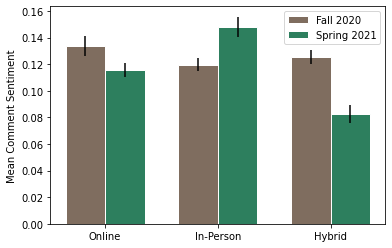

In [ ]:
# set width of bars
barWidth = 0.35
 
# set heights of bars
bars2 = [rm_mean_f, ip_mean_f, hb_mean_f]
bars3 = [rm_mean_s, ip_mean_s, hb_mean_s]
 
# Set position of bar on X axis
r2 = np.arange(len(bars2))
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r2, bars2, yerr=[0.014374215761069842 / 2, 0.009983292598012505 / 2, 0.010462654371930336 / 2], color='#7f6d5f', width=barWidth, edgecolor='white', label='Fall 2020')
plt.bar(r3, bars3, yerr=[0.010475332778305368 / 2, 0.01488268876193749 / 2, 0.013712987727518305 / 2], color='#2d7f5e', width=barWidth, edgecolor='white', label='Spring 2021')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth - 0.175 for r in range(len(bars1))], ['Online', 'In-Person', 'Hybrid'])
plt.ylabel('Mean Comment Sentiment')

# Create legend & Show graphic
plt.legend()

Sentiment Based on Region

In [ ]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

In [146]:
fall_mean_sent = []
spring_mean_sent = []
for school in all_univs:
  fall_mean_sent.append(all_uni_stats[school][1])
  spring_mean_sent.append(all_uni_stats[school][4])

sent = fall_mean_sent + spring_mean_sent
print(sent)

[0.10974125258799172, 0.21054133333333333, 0.14081714285714286, 0.047364593301435415, 0.10727984615384614, 0.14478686046511627, 0.13672860215053764, 0.14042220670391062, 0.1312768115942029, 0.2620523809523809, 0.22574212721584982, 0.12455386680988186, 0.17332173913043478, 0.17515395095367844, 0.09978988095238095, 0.18149332369942198, 0.3188673716012085, 0.07390229202037353, 0.025278090943254422, 0.14088271062271063, 0.015164014466546112, 0.12016125000000001, 0.026816056034482758, 0.11016857825567505, 0.2470306338028169, 0.05299388523047977, 0.0989737986270023, 0.13163782505910165, 0.17555403288958496, 0.16191587646802957, 0.0639828502415459, 0.11562668539325843, 0.11425344995140914, 0.27979187648456055, 0.06894626623376623, 0.09197456, 0.08871785962473941, 0.12760135275754422, 0.23342430555555554, 0.19898917910447764, 0.02828339410939691, 0.2168076158940397, 0.28581041055718476, 0.14746952380952383, 0.25616286836935165, 0.15056095186587345, 0.13500444444444445, 0.11459285714285715, 0.0

In [122]:
cases = []
for school in all_univs:
  if school in new_england:
    cases.append(2.87695543122557)
  elif school in mid_atlantic:
    cases.append(3.4372237388163573)
  elif school in east_north_central:
    cases.append(6.33303941595009)
  elif school in west_north_central:
    cases.append(8.091565578753393)
  elif school in south_atlantic:
    cases.append(4.451383229853076)
  elif school in east_south_central:
    cases.append(6.485332182535187)
  elif school in west_south_central:
    cases.append(6.157937392531796)
  elif school in mountain:
    cases.append(6.6513582043307125)
  elif school in pacific:
    cases.append(3.4804517410057656)

for school in all_univs:
  if school in new_england:
    cases.append(4.104581590152892)
  elif school in mid_atlantic:
    cases.append(5.085395401215568)
  elif school in east_north_central:
    cases.append(3.422274059230989)
  elif school in west_north_central:
    cases.append(2.9094031082019614)
  elif school in south_atlantic:
    cases.append(4.108145517436194)
  elif school in east_south_central:
    cases.append(3.7419580558513004)
  elif school in west_south_central:
    cases.append(3.7802309974428185)
  elif school in mountain:
    cases.append(3.403795555115627)
  elif school in pacific:
    cases.append(2.471691099996717)

In [123]:
deaths = []
for school in all_univs:
  if school in new_england:
    deaths.append(0.046374580827569685)
  elif school in mid_atlantic:
    deaths.append(0.05905766822073005)
  elif school in east_north_central:
    deaths.append(0.07076216023354316)
  elif school in west_north_central:
    deaths.append(0.09741081763518489)
  elif school in south_atlantic:
    deaths.append(0.06151975877044149)
  elif school in east_south_central:
    deaths.append(0.0857277100217408)
  elif school in west_south_central:
    deaths.append(0.08561815976973948)
  elif school in mountain:
    deaths.append(0.07097546105114794)
  elif school in pacific:
    deaths.append(0.029647461990574886)

for school in all_univs:
  if school in new_england:
    deaths.append(0.0545208786569808)
  elif school in mid_atlantic:
    deaths.append(0.08237951788293428)
  elif school in east_north_central:
    deaths.append(0.07260541709449206)
  elif school in west_north_central:
    deaths.append(0.05412796117231704)
  elif school in south_atlantic:
    deaths.append(0.07732050809543047)
  elif school in east_south_central:
    deaths.append(0.09930961328330697)
  elif school in west_south_central:
    deaths.append(0.08553192103418158)
  elif school in mountain:
    deaths.append(0.06355509683974972)
  elif school in pacific:
    deaths.append(0.03872182862225765)

In [124]:
policy = []

for school in all_univs:
  if school in online_f:
    policy.append("Online")
  elif school in hybrid_f:
    policy.append("Hybrid")
  elif school in in_person_f:
    policy.append("In-Person")

for school in all_univs:
  if school in online_s:
    policy.append("Online")
  elif school in hybrid_s:
    policy.append("Hybrid")
  elif school in in_person_s:
    policy.append("In-Person")

In [106]:
all_sentiment_scores = [item for sublist in all_sentiment_scores for item in sublist]

In [150]:
data = pd.DataFrame(list(zip(sent, cases, deaths, policy)), columns =['Sentiment', 'Cases', 'Deaths', 'Policy'])

X = data[['Cases', 'Policy']]
X = pd.get_dummies(data=X, drop_first=True)
Y = data['Sentiment']
X.head

X = sm.add_constant(X)


# Fit regression model (using the natural log of one of the regressors)
results = sm.OLS(Y, X).fit()

# # Inspect the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9981
Date:                Mon, 10 Jan 2022   Prob (F-statistic):              0.398
Time:                        23:21:08   Log-Likelihood:                 104.87
No. Observations:                  90   AIC:                            -201.7
Df Residuals:                      86   BIC:                            -191.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1788      0.030  

In [151]:
lm = pg.linear_regression(X, Y, relimp=True)
display(lm) 

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,0.178797,0.030054,5.949263,5.659575e-08,0.033645,-0.000065,0.119052,0.238541,NaN,NaN
1,Cases,-0.008845,0.005516,-1.603473,1.124968e-01,0.033645,-0.000065,-0.019810,0.002121,0.030717,91.297622
2,Policy_In-Person,0.004785,0.020868,0.229313,8.191702e-01,0.033645,-0.000065,-0.036698,0.046269,0.000470,1.398127
3,Policy_Online,0.004774,0.020273,0.235498,8.143825e-01,0.033645,-0.000065,-0.035527,0.045076,0.002458,7.304251


In [ ]:
# New England
ne_pc, ne_mean, ne_stdev, ne_df = compile_filter_analyze(new_england, False, False)
ne_pc_f, ne_mean_f, ne_stdev_f, ne_df_f = compile_filter_analyze(new_england, True, False)
ne_pc_s, ne_mean_s, ne_stdev_s, ne_df_s = compile_filter_analyze(new_england, False, True)

# Mid-Atlantic
ma_pc, ma_mean, ma_stdev, ma_df = compile_filter_analyze(mid_atlantic, False, False)
ma_pc_f, ma_mean_f, ma_stdev_f, ma_df_f = compile_filter_analyze(mid_atlantic, True, False)
ma_pc_s, ma_mean_s, ma_stdev_s, ma_df_s = compile_filter_analyze(mid_atlantic, False, True)

# East North Central
enc_pc, enc_mean, enc_stdev, enc_df = compile_filter_analyze(east_north_central, False, False)
enc_pc_f, enc_mean_f, enc_stdev_f, enc_df_f = compile_filter_analyze(east_north_central, True, False)
enc_pc_s, enc_mean_s, enc_stdev_s, enc_df_s  = compile_filter_analyze(east_north_central, False, True)

# West North Central
wnc_pc, wnc_mean, wnc_stdev, wnc_df = compile_filter_analyze(west_north_central, False, False)
wnc_pc_f, wnc_mean_f, wnc_stdev_f, wnc_df_f = compile_filter_analyze(west_north_central, True, False)
wnc_pc_s, wnc_mean_s, wnc_stdev_s, wnc_df_s = compile_filter_analyze(west_north_central, False, True)

# South Atlantic
sa_pc, sa_mean, sa_stdev, sa_df = compile_filter_analyze(south_atlantic, False, False)
sa_pc_f, sa_mean_f, sa_stdev_f, sa_df_f = compile_filter_analyze(south_atlantic, True, False)
sa_pc_s, sa_mean_s, sa_stdev_s, sa_df_s = compile_filter_analyze(south_atlantic, False, True)

# East South Central
esc_pc, esc_mean, esc_stdev, esc_df = compile_filter_analyze(east_south_central, False, False)
esc_pc_f, esc_mean_f, esc_stdev_f, esc_df_f = compile_filter_analyze(east_south_central, True, False)
esc_pc_s, esc_mean_s, esc_stdev_s, esc_df_s = compile_filter_analyze(east_south_central, False, True)

# West South Central
wsc_pc, wsc_mean, wsc_stdev, wsc_df = compile_filter_analyze(west_south_central, False)
wsc_pc_f, wsc_mean_f, wsc_stdev_f, wsc_df_f = compile_filter_analyze(west_south_central, True, False)
wsc_pc_s, wsc_mean_s, wsc_stdev_s, wsc_df_s = compile_filter_analyze(west_south_central, False, True)

# Mountain
mt_pc, mt_mean, mt_stdev, mt_df = compile_filter_analyze(mountain, False, False)
mt_pc_f, mt_mean_f, mt_stdev_f, mt_df_f = compile_filter_analyze(mountain, True, False)
mt_pc_s, mt_mean_s, mt_stdev_s, mt_df_s = compile_filter_analyze(mountain, False, True)

# Pacific
pa_pc, pa_mean, pa_stdev, pa_df = compile_filter_analyze(pacific, False, False)
pa_pc_f, pa_mean_f, pa_stdev_f, pa_df_f = compile_filter_analyze(pacific, True, False)
pa_pc_s, pa_mean_s, pa_stdev_s, pa_df_s = compile_filter_analyze(pacific, False, True)